<a href="https://colab.research.google.com/github/sergope/tfm/blob/main/prophet_one_magnitude_aemet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Conectar el notebook con la cuenta de gdrive
from google.colab import drive
drive.mount('/content/drive/', force_remount=False)

BASE_FOLDER = 'drive/My Drive/TFM/resources/'

Mounted at /content/drive/


In [ ]:
%run 'drive/My Drive/TFM/prophet_functions'.ipynb
%run 'drive/My Drive/TFM/plot_functions'.ipynb
%run 'drive/My Drive/TFM/error_functions'.ipynb
%run 'drive/My Drive/TFM/resources/enums'.ipynb

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds        yhat  yhat_lower  yhat_upper
0    2013-02-15  135.465546  103.966976  167.514316
1    2013-02-16  113.332773   82.806267  146.982084
2    2013-02-17   74.404906   44.908964  104.845467
3    2013-02-18   86.821279   56.329291  116.650097
4    2013-02-19   56.297263   22.741977   89.007795
...         ...         ...         ...         ...
2413 2020-01-03   88.044951   57.698106  119.307611
2414 2020-01-04   71.519852   42.471811  102.307977
2415 2020-01-05  104.512469   74.430465  135.144947
2416 2020-01-06  111.848360   82.489975  143.224766
2417 2020-01-07  134.238741  102.213222  166.362793

[2418 rows x 4 columns]


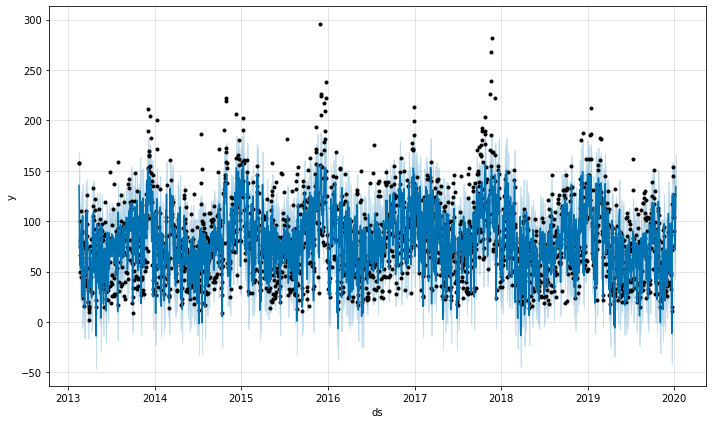

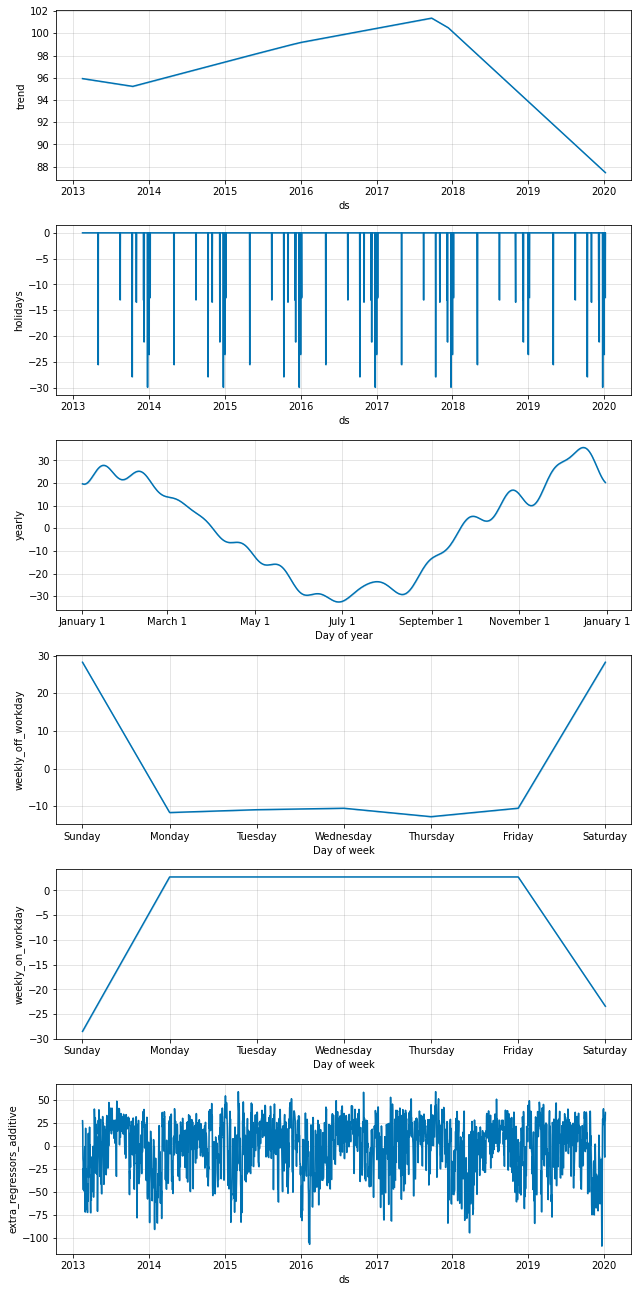

In [ ]:
file_name_aemet = "aemet_getafe"
file_name_magnitude = "getafe"
magnitude = 8
periods = 7
columns_to_filter =  ['PREC', 'RACHA', 'PRESMAX', 'PRESMIN', 'VELMEDIA', 'SOL', 'TMIN', 'TMAX']
# columns_to_filter =  ['PREC','TMAX']
options = {
    "holidays": True,
    "yearly_order": 15,
    "weekly_order": 20,
    "cross_validations": False,
    "plot_figures": True,
    "figs_cross_validations": ['rmse']
    }

result = predict_one_magnitude_with_aemet(file_name_magnitude, magnitude, file_name_aemet, columns_to_filter, periods, options)

merged_df = result['df_merged']
forecast_df = result['forecast']

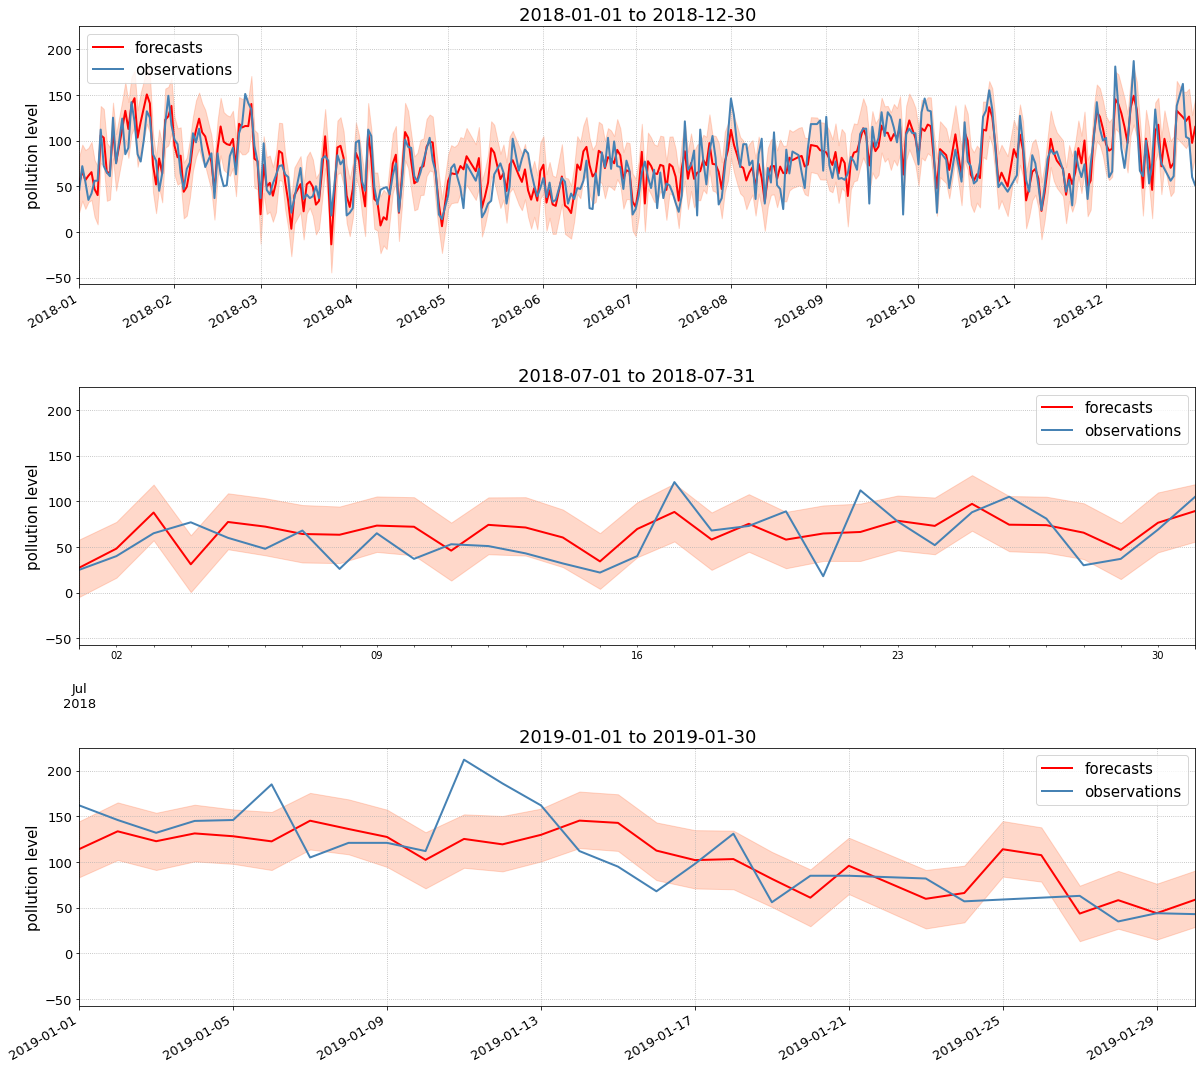

In [ ]:
merged_df['ds'] = pd.to_datetime(forecast_df['ds'])

f, axes = plt.subplots(nrows=3, figsize=(20,20), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

ax = axes[0]

make_plot_block(merged_df, forecast_df, '2018-01-01', '2018-12-30', ax=ax)

ax = axes[1]

make_plot_block(merged_df, forecast_df, '2018-07-01', '2018-07-31', ax=ax)

ax = axes[2]

make_plot_block(merged_df, forecast_df, '2019-01-01', '2019-01-30', ax=ax)


# for ext in ['png','jpeg','pdf']: 
#     f.savefig('../figures/paper/forecasts_obs_2017-08.{}'.format(ext), dpi=200)

In [ ]:
# Cálculo RMSE
date_init = '2018-01-01'
date_end = '2018-04-30'

rmse = calculate_rmse(merged_df, forecast_df, date_init, date_end)

rmse

18.860763127881587

In [ ]:
NO2 = indice_contaminantes['NO2']

NO2

{'BUENO': 100,
 'DESCRIPCION': 'Dióxido de Nitrógeno (NO2)',
 'MALO': 400,
 'MUY_BUENO': 40,
 'MUY_MALO': 1000,
 'REGULAR': 200}

In [ ]:
# Check true and dalse positives
%run 'drive/My Drive/TFM/error_functions'.ipynb
limit = 160
date_init = '2018-01-01'
date_end = '2018-12-30'

check_week(merged_df, forecast_df, date_init, date_end, limit)

true_positive = 13
true_negative = 309
false_positive = 11
false_negative = 4
